In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


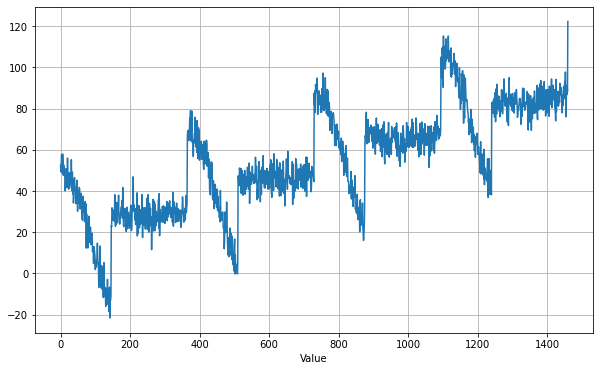

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None ):
  plt.plot(time[start:end], series[start:end])
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)


def trend(time, slope=0):
  return(slope*time)

def seasonal_pattern(season_time) : 
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
def seasonality(time, period, amplitude=1, phase=0)    :
  season_time = ((time + phase)%period)/period
  return(amplitude*seasonal_pattern(season_time))

def noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return(rnd.randn(len(time))*noise_level )


time = np.arange(4*365+1, dtype='float32')
baseline = 10
series = trend(time, 0.1)
amplitude=40
slope = 0.05
noise_level = 5

series = baseline + trend(slope, time) + seasonality(time, period=365, amplitude=amplitude)

series+= noise(time, noise_level, seed=42)


plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

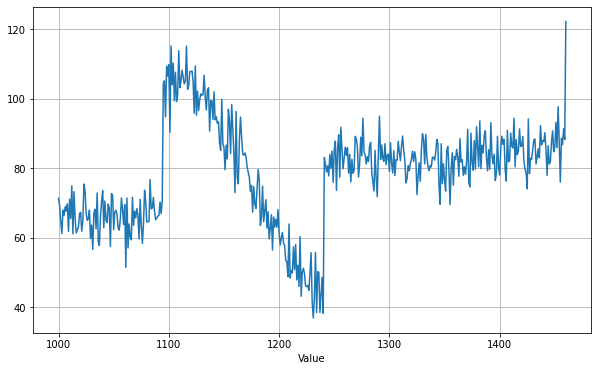

In [6]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

In [7]:
naive_forecast = series[split_time - 1:-1]

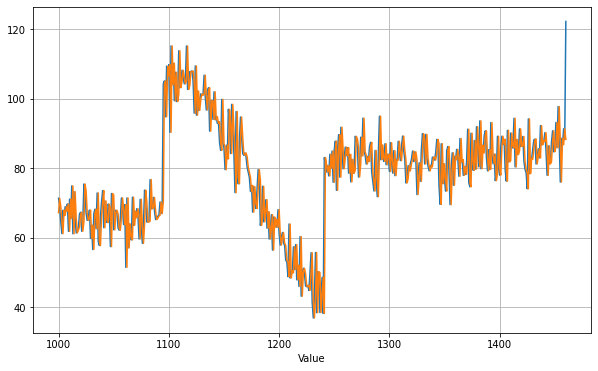

In [8]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

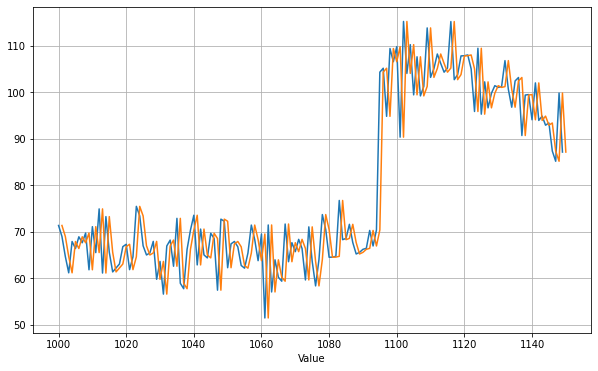

In [9]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

In [10]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827534
5.937908


In [13]:
def moving_average_forecast(series, window_size):
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time : time + window_size].mean())
  return(np.array(forecast))

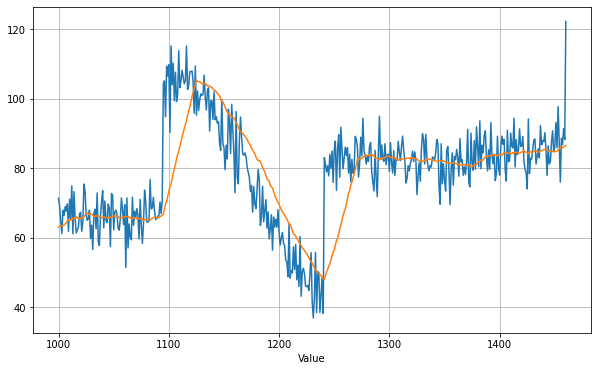

In [14]:
moving_avg = moving_average_forecast(series, 30)[split_time-30 : ]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [15]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

106.674576
7.1424184


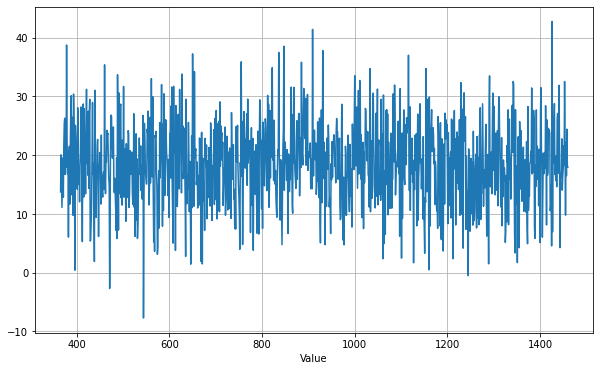

In [16]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

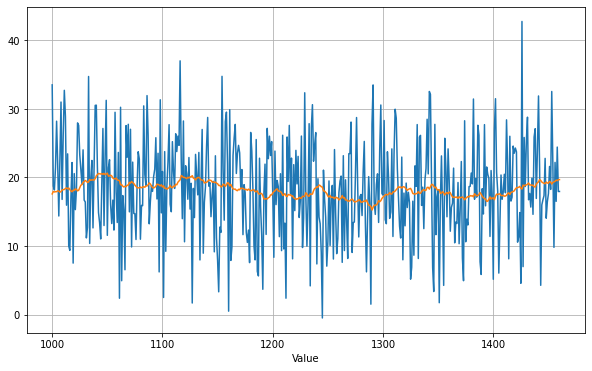

In [17]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365 : ])
plot_series(time_valid, diff_moving_avg)
plt.show()

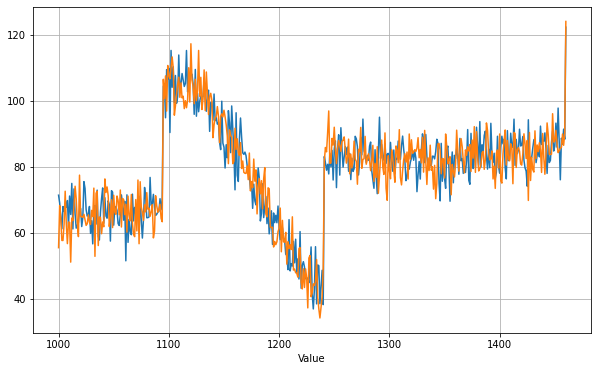

In [18]:
diff_moving_avg_plus_past = series[split_time - 365 : -365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [19]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

52.97366
5.839311


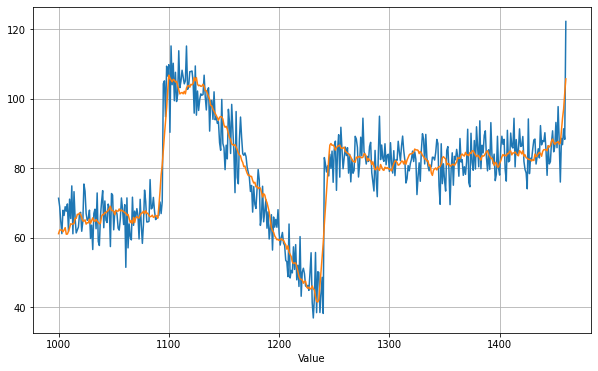

In [20]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370: -360], 10) + diff_moving_avg


plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)

plt.show()

In [21]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

33.452263
4.569442
